In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



In [2]:
# Load the dataset
data = pd.read_csv('StressLevelDataset.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())


   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

In [3]:
data.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Feature Scaling
scaler = MinMaxScaler()
data[['anxiety_level', 'depression', 'blood_pressure', 'sleep_quality']] = scaler.fit_transform(
    data[['anxiety_level', 'depression', 'blood_pressure', 'sleep_quality']])

       anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean        0.526840    17.777273               0.492727     0.465017   
std         0.291312     8.944599               0.500175     0.286185   
min         0.000000     0.000000               0.000000     0.000000   
25%         0.285714    11.000000               0.000000     0.222222   
50%         0.523810    19.000000               0.000000     0.444444   
75%         0.761905    26.000000               1.000000     0.703704   
max         1.000000    30.000000               1.000000     1.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        0.590909       0.532000           2.753636   
std       1.409356        0.416787       0.309677           1.400713   
min       0.000000        0.000000       0.000000     

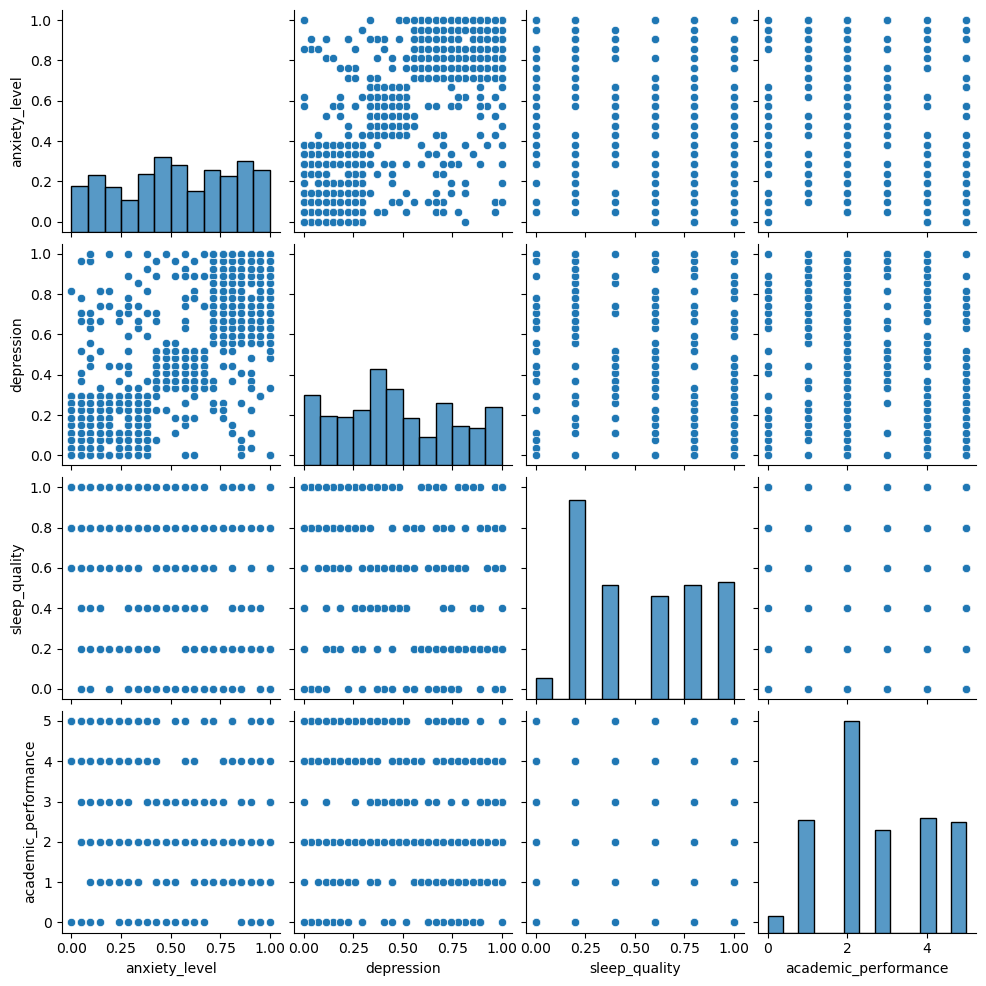

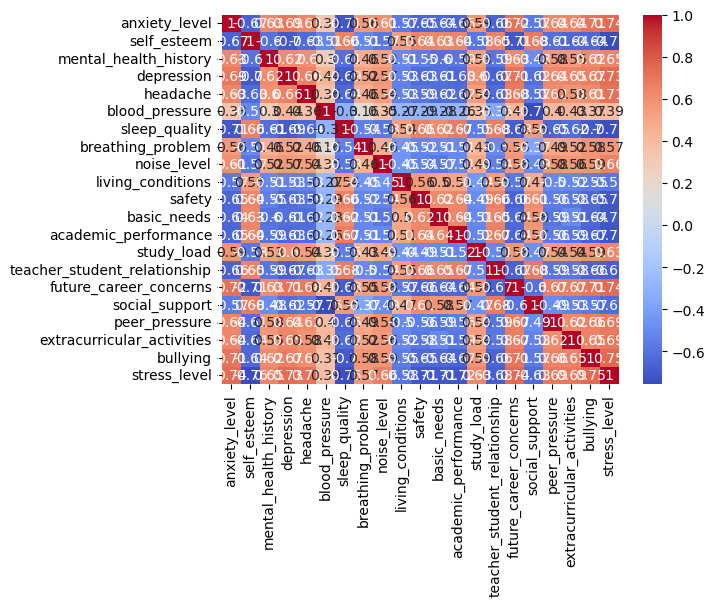

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistics
print(data.describe())

# Visualizations
sns.pairplot(data[['anxiety_level', 'depression', 'sleep_quality', 'academic_performance']])
plt.show()

# Correlation Heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [6]:

# Splitting the data into features (X) and target (y)
X = data.drop('stress_level', axis=1)
y = data['stress_level']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 87.27272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        76
           1       0.90      0.86      0.88        73
           2       0.90      0.86      0.88        71

    accuracy                           0.87       220
   macro avg       0.88      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



In [7]:
# Importing necessary libraries for Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Initializing the Naive Bayes Classifier
nb_model = GaussianNB()

# Training the model
nb_model.fit(X_train, y_train)

# Making predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluating the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy:', accuracy_nb*100)
print('Classification Report:')
print(classification_report(y_test, y_pred_nb))

Accuracy: 90.0
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        76
           1       0.98      0.85      0.91        73
           2       0.81      0.96      0.88        71

    accuracy                           0.90       220
   macro avg       0.91      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



In [8]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.526840,17.777273,0.492727,0.465017,2.508182,0.590909,0.532000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,0.291312,8.944599,0.500175,0.286185,1.409356,0.416787,0.309677,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,11.000000,0.000000,0.222222,1.000000,0.000000,0.200000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,0.523810,19.000000,0.000000,0.444444,3.000000,0.500000,0.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,0.761905,26.000000,1.000000,0.703704,3.000000,1.000000,0.800000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,1.000000,30.000000,1.000000,1.000000,5.000000,1.000000,1.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


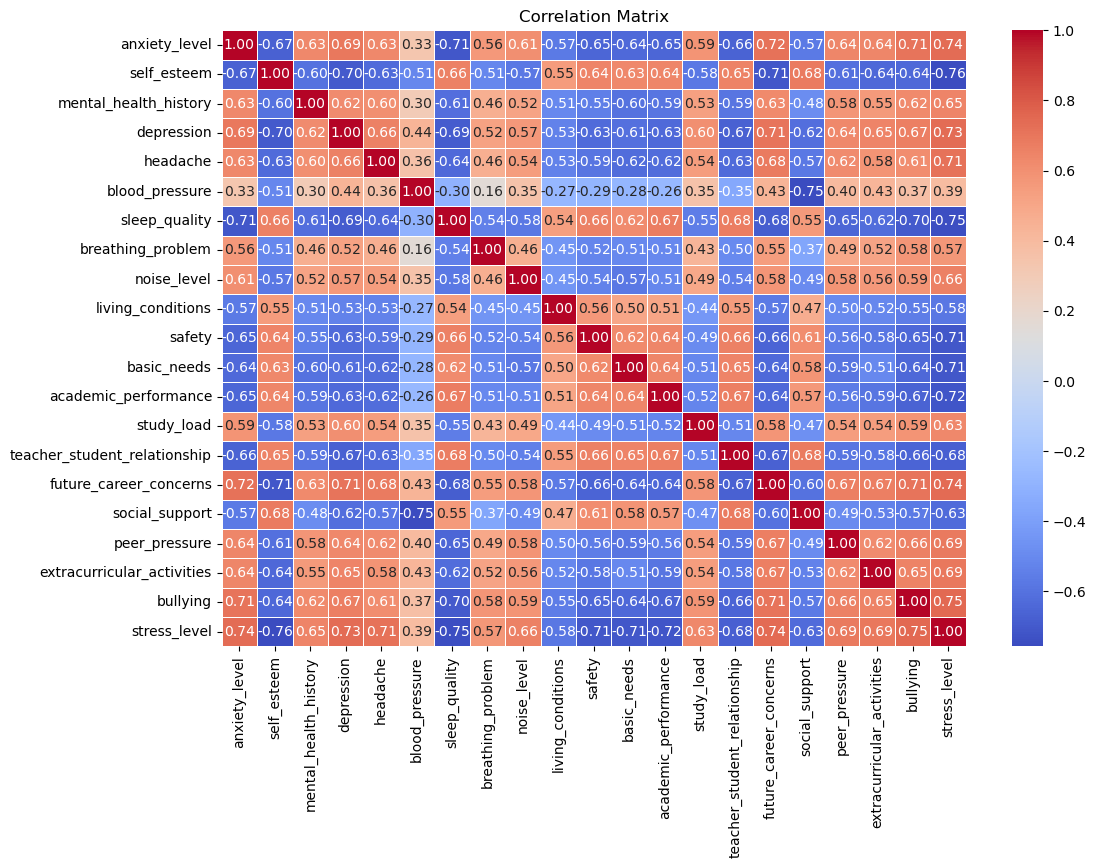

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is the dataset
corr_matrix = data.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


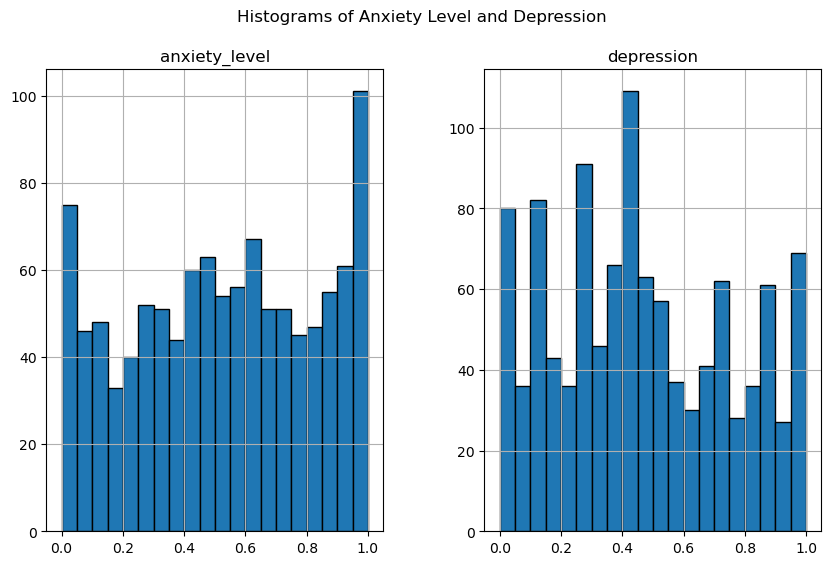

In [10]:
# Plotting histograms for key features like 'anxiety_level' and 'depression'
data[['anxiety_level', 'depression']].hist(bins=20, figsize=(10, 6), edgecolor='black')
plt.suptitle("Histograms of Anxiety Level and Depression")
plt.show()


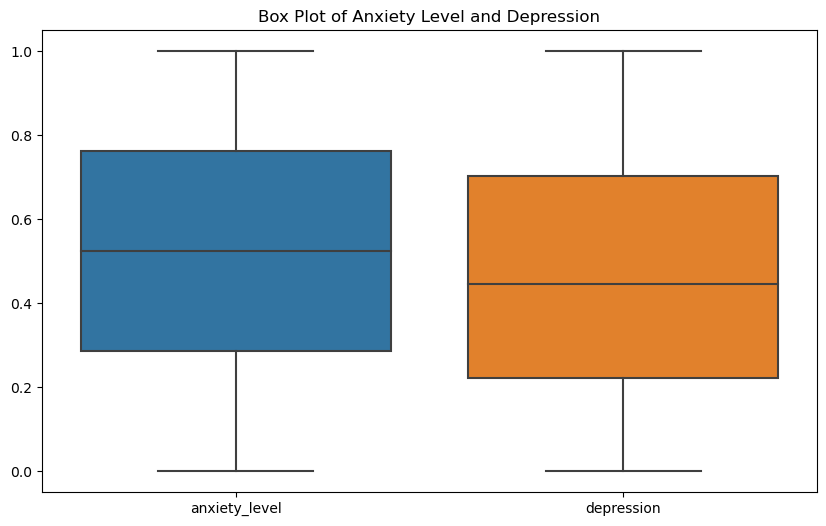

In [11]:
# Box plot for anxiety_level and depression
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['anxiety_level', 'depression']])
plt.title("Box Plot of Anxiety Level and Depression")
plt.show()


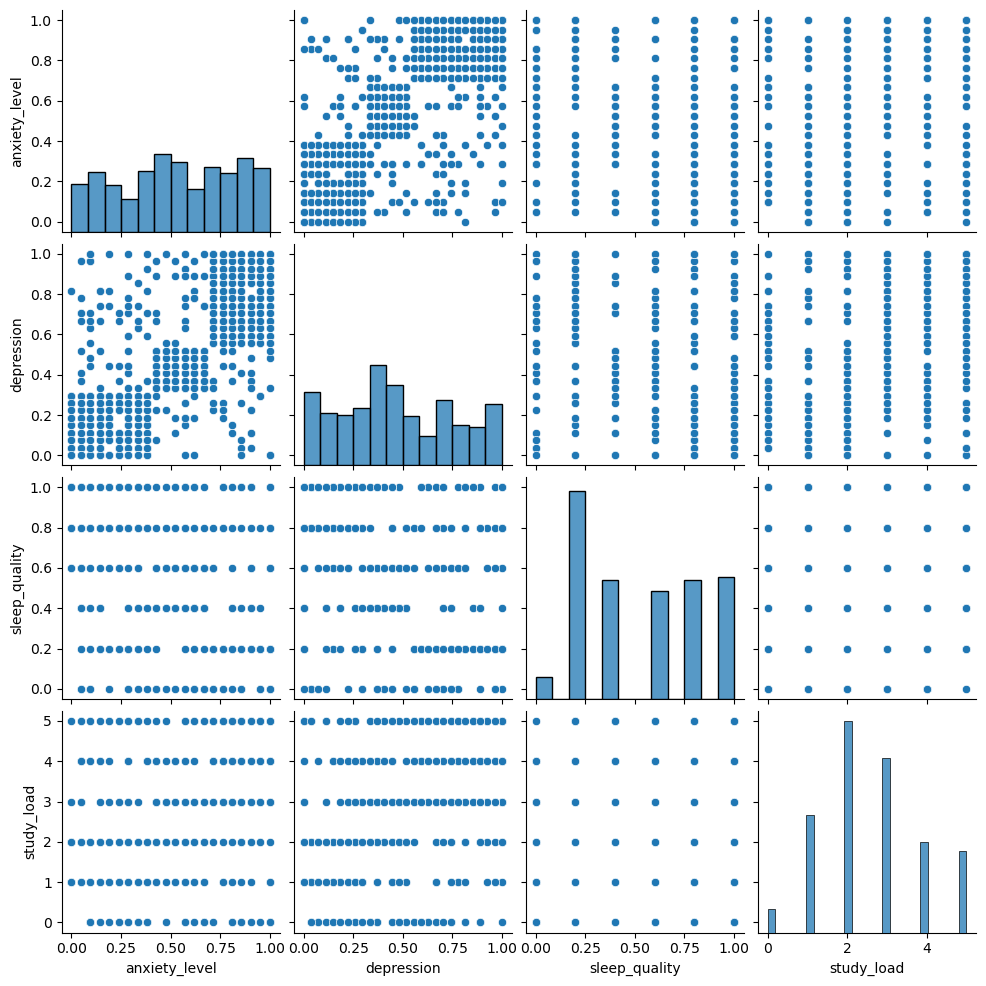

In [12]:
# Pairplot to visualize relationships between anxiety_level, depression, and other key features
sns.pairplot(data[['anxiety_level', 'depression', 'sleep_quality', 'study_load']])
plt.show()


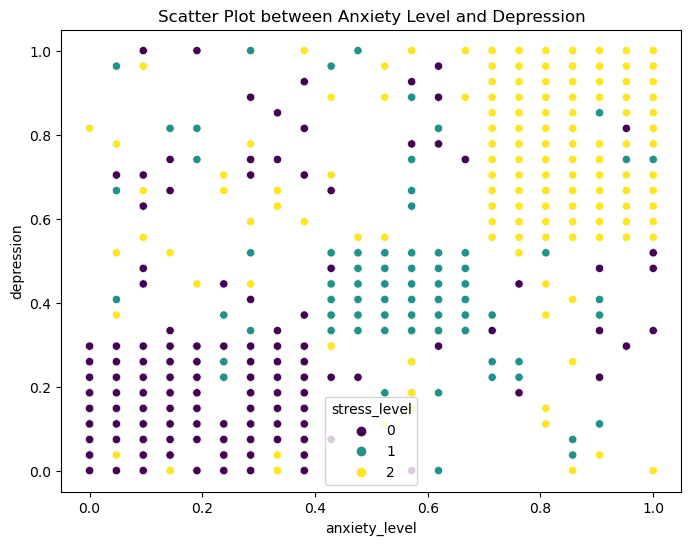

In [13]:
# Scatter plot to observe relationship between anxiety_level and depression
plt.figure(figsize=(8, 6))
sns.scatterplot(x='anxiety_level', y='depression', data=data, hue='stress_level', palette='viridis')
plt.title("Scatter Plot between Anxiety Level and Depression")
plt.show()


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# 1. Naive Bayes - Train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 2. Random Forest Classifier - Train
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# 3. Support Vector Machine (SVM) - Train
svm_model = SVC(kernel='linear')  # You can try other kernels like 'rbf' if needed
svm_model.fit(X_train, y_train)

# Testing phase

# Predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

Naive Bayes Model Evaluation
Accuracy: 90.0
Precision: 0.9095999130245705
Recall: 0.9
F1-Score: 0.9010214783624486
Confusion Matrix:
[[68  1  7]
 [ 2 62  9]
 [ 3  0 68]]


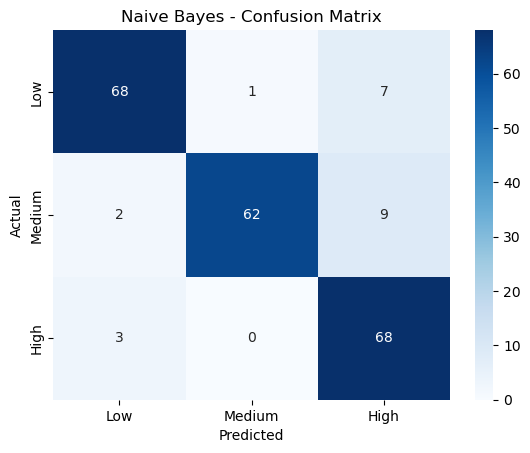


Random Forest Model Evaluation
Accuracy: 87.72727272727273
Precision: 0.8790183756125785
Recall: 0.8772727272727273
F1-Score: 0.8775901632697375
Confusion Matrix:
[[68  2  6]
 [ 6 64  3]
 [ 7  3 61]]


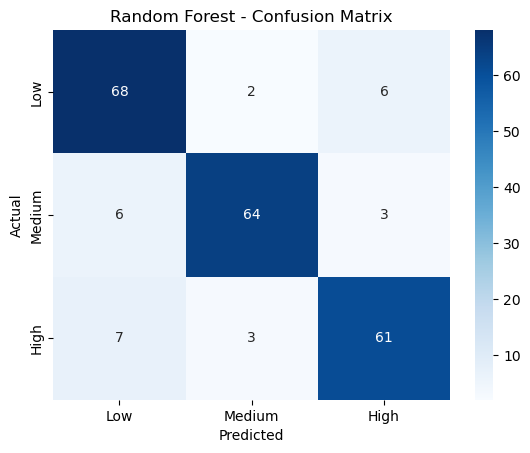


SVM Model Evaluation
Accuracy: 89.54545454545455
Precision: 0.8958295327860547
Recall: 0.8954545454545455
F1-Score: 0.8955312868949232
Confusion Matrix:
[[68  4  4]
 [ 5 66  2]
 [ 5  3 63]]


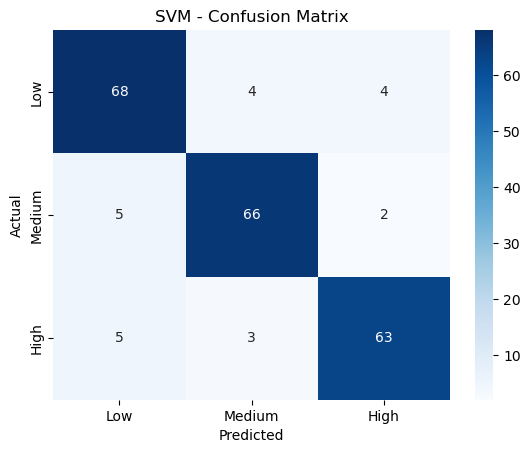

In [15]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Performance Evaluation for Naive Bayes
print("Naive Bayes Model Evaluation")
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
cm_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb*100}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1-Score: {f1_nb}")
print("Confusion Matrix:")
print(cm_nb)

# Plot Confusion Matrix for Naive Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Performance Evaluation for Random Forest
print("\nRandom Forest Model Evaluation")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf*100}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")
print("Confusion Matrix:")
print(cm_rf)

# Plot Confusion Matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Performance Evaluation for SVM
print("\nSVM Model Evaluation")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
cm_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm*100}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")
print("Confusion Matrix:")
print(cm_svm)

# Plot Confusion Matrix for SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
import joblib
# Step 4: Save the trained model
joblib.dump(nb_model, 'stress_level_model.pkl')
print("Model saved as 'stress_level_model.pkl'")

Model saved as 'stress_level_model.pkl'


Top 5 important features based on Random Forest:
                       Feature  Importance
5               blood_pressure    0.152873
6                sleep_quality    0.079648
18  extracurricular_activities    0.077840
19                    bullying    0.070069
11                 basic_needs    0.068984


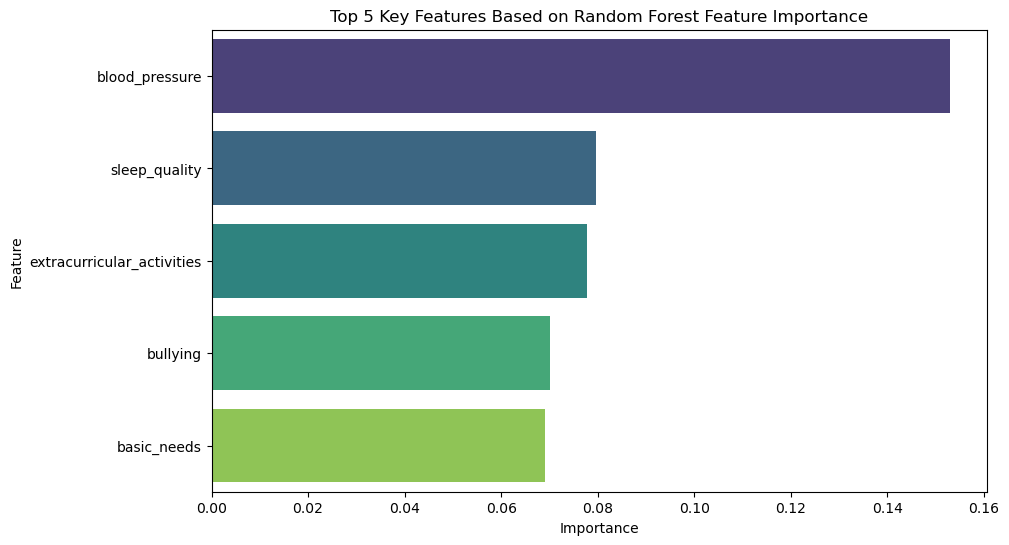

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming 'data' is the DataFrame)
# Example: data = pd.read_csv('your_dataset.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['stress_level'])  # Replace 'target' with your actual target column
y = data['stress_level']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 5 features
top_5_features = feature_importance_df.head(5)

# Display the top 5 features
print("Top 5 important features based on Random Forest:")
print(top_5_features)

# Visualizing top 5 important features with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features, palette="viridis")
plt.title("Top 5 Key Features Based on Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Top 5 important features based on Naive Bayes:
                       Feature  Importance
10                      safety         1.0
11                 basic_needs         1.0
18  extracurricular_activities         1.0
4                     headache         1.0
16              social_support         1.0


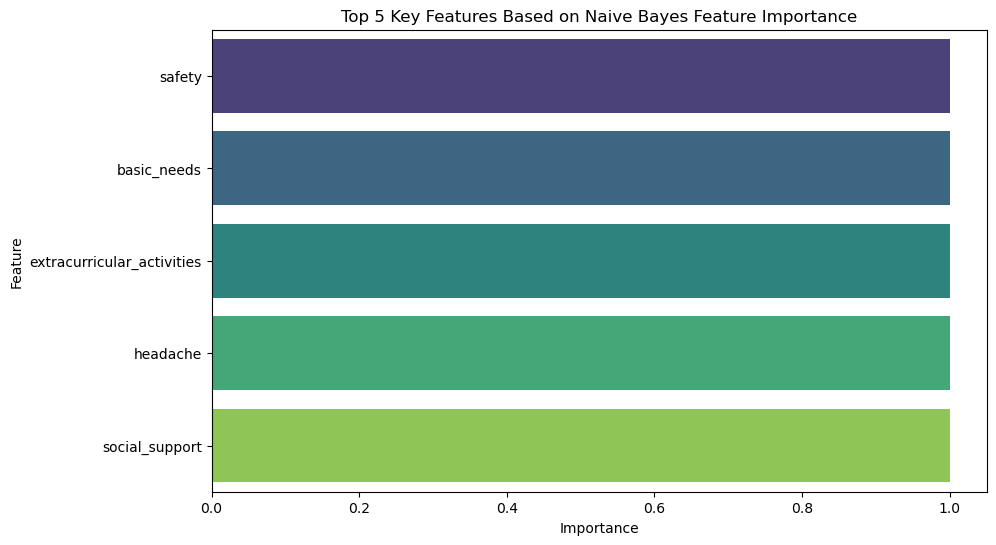

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset (assuming 'data' is the DataFrame)
# Example: data = pd.read_csv('your_dataset.csv')

# Separate features (X) and target (y)
X = data.drop(columns=['stress_level'])  # Replace 'target' with your actual target column
y = data['stress_level']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Calculate feature importance using the inverse of the feature variance
# Features with low variance (high importance) are most influential
feature_variance = np.var(X_train_scaled, axis=0)
feature_importance = 1 / feature_variance

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top 5 features
top_5_features = feature_importance_df.head(5)

# Display the top 5 features
print("Top 5 important features based on Naive Bayes:")
print(top_5_features)

# Visualizing top 5 important features with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features, palette="viridis")
plt.title("Top 5 Key Features Based on Naive Bayes Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
